In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv("/content/Admission_Predict.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.drop(columns=['Serial No.'],inplace=True)

In [ ]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(20,input_shape=(7,), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
# model.add(Drop(0.2))
# model.add(Dense(20,input_shape=(7,), activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
# model.add(Dense(10, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 20)                  │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 501 (1.96 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 60 (240.00 B)

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
model.compile(loss = "huber", optimizer = "adam", metrics = ["r2_score"])

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2, batch_size=5, callbacks = callback)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0040 - r2_score: 0.5585 - val_loss: 0.0045 - val_r2_score: 0.3610
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - r2_score: 0.5751 - val_loss: 0.0046 - val_r2_score: 0.3402
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044 - r2_score: 0.5071 - val_loss: 0.0031 - val_r2_score: 0.5639
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - r2_score: 0.5711 - val_loss: 0.0025 - val_r2_score: 0.6425
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - r2_score: 0.5894 - val_loss: 0.0036 - val_r2_score: 0.4856
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - r2_score: 0.5650 - val_loss: 0.0041 - val_r2_score: 0.4205
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - r2_score: 0.6053 - val_loss: 0.0029 - val_r2_score: 0.5852
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - r2_score: 0.6357 - val_loss: 0.0123 - val_r

In [ ]:
y_pred = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


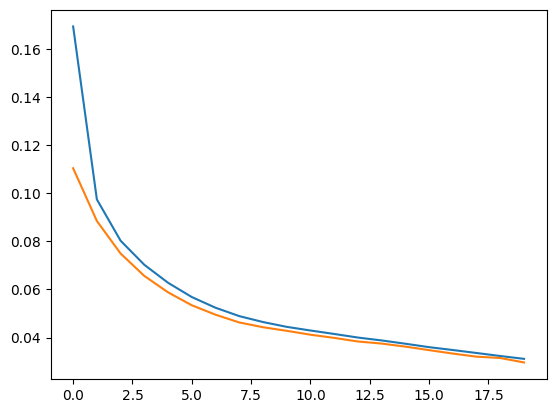

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

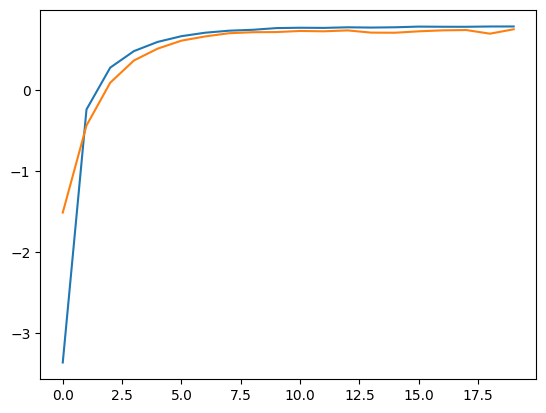

In [ ]:
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])

In [ ]:
model.get_weights()[1]

array([ 0.00589891,  0.03576985, -0.0453404 ,  0.10042921,  0.012508  ,
       -0.00865642, -0.01959695,  0.06322479, -0.04617063, -0.06186744,
        0.08027832,  0.01480062,  0.07617401,  0.09761135,  0.08285356,
       -0.052457  , -0.03969053, -0.0023055 , -0.0447151 , -0.01834413],
      dtype=float32)

In [18]:
model.get_weights()[0]

array([[ 0.02223459,  0.33804438, -0.04876085, -0.24435498,  0.00133436,
         0.11039197,  0.17099828,  0.1860121 ,  0.42854828,  0.21654506,
         0.412575  ,  0.10149615, -0.02456588, -0.03213732, -0.1463036 ,
        -0.00637046,  0.2092457 ,  0.18629763,  0.02455273, -0.13894929],
       [-0.34054133,  0.50894135,  0.08681519,  0.16825439, -0.21505399,
        -0.5177544 ,  0.4246424 ,  0.3643615 ,  0.02158537,  0.11093002,
         0.07101841,  0.33127907, -0.1651065 ,  0.09744425,  0.30864507,
         0.434577  ,  0.30176675,  0.24801768,  0.3378365 ,  0.01744331],
       [-0.1647311 , -0.20487958,  0.09521737,  0.31276146, -0.24693598,
        -0.2061076 , -0.05457186,  0.41470122,  0.25350764,  0.227802  ,
        -0.23360954, -0.44502673, -0.27504945,  0.25309882,  0.23527978,
         0.02728024,  0.13600375,  0.3241617 ,  0.04644434,  0.05812764],
       [-0.09709217,  0.24251598, -0.115651  ,  0.08795781,  0.15962332,
         0.07146144, -0.271654  ,  0.00297654,  